In [1]:
#import gdal
from osgeo import gdal
from numpy import *

import matplotlib.pyplot as plt
%matplotlib inline

import rasterio
from rasterio import plot

from spectral import *
import spectral.io.envi

from rasterio.plot import show

import pandas as pd
import geopandas

import shapely
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely import wkt
from shapely.geometry import shape, mapping

#import shapely.wkt
import shapely.geometry as geometry

In [2]:
herberton = Polygon([
            [145.41327472275032, -17.36669084460675],
            [145.41327472275032, -17.55535805363121],
            [145.5425637008542, -17.55535805363121],
            [145.5425637008542, -17.36669084460675],
            [145.41327472275032, -17.36669084460675]
          ])  

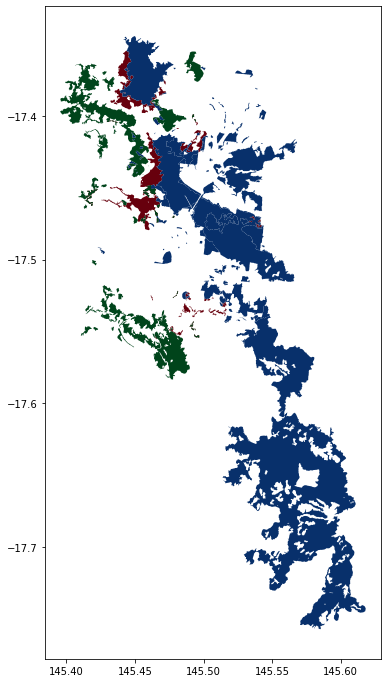

In [66]:
fg = 12
noneuc = geopandas.read_file("Non_Eucalyptus_Reg_Ecos_2017/Non_Eucalypt_RE.shp")
euc = geopandas.read_file("Monospecies_Reg_Ecos_2017/FF_SingleSp_RE_2017_V11.shp")
eucmg = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")

subset2m = eucmg[eucmg.intersects(herberton)]
subset2 = euc[euc.intersects(herberton)]
subset2ne = noneuc[noneuc.intersects(herberton)]
ax = subset2.plot(color='white',figsize=(fg,fg))

cmap_reds=plt.cm.get_cmap('Reds', 2)
cmap_blues=plt.cm.get_cmap('Blues', 2)
cmap_greens=plt.cm.get_cmap('Greens', 2)

subset2x = subset2
subset2x.plot(ax=ax,color=cmap_reds(2),figsize=(fg,fg))
        
subset2x = subset2ne
subset2x.plot(ax=ax,color=cmap_blues(2),figsize=(fg,fg))

subset2x = subset2m
subset2x.plot(ax=ax,color=cmap_greens(2),figsize=(fg,fg))

needed_herberton_polygons = pd.concat([subset2,subset2ne,subset2m])

In [76]:
noneuc = geopandas.read_file("Non_Eucalyptus_Reg_Ecos_2017/Non_Eucalypt_RE.shp")
euc = geopandas.read_file("Monospecies_Reg_Ecos_2017/FF_SingleSp_RE_2017_V11.shp")
eucmg = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")
eucmgs = eucmg[['RE', 'Descriptio', 'geometry']].copy()
noneucs = noneuc[['RE', 'Descriptio', 'geometry']].copy()
eucs = euc[['QLD_REG_EC','FF_singl_1','geometry']].copy()
eucs.rename(columns={'QLD_REG_EC': 'RE', 'FF_singl_1': 'Descriptio', 'geometry': 'geometry'}, inplace=True)
eucs['euc'] = 1
eucmgs['euc'] = 1
noneucs['euc'] = 0
merged = eucs.append(eucmgs,sort=False)
fpdf = merged.append(noneucs,sort=False)

In [69]:
noneuc = geopandas.read_file("Non_Eucalyptus_Reg_Ecos_2017/Non_Eucalypt_RE.shp")
euc = geopandas.read_file("Monospecies_Reg_Ecos_2017/FF_SingleSp_RE_2017_V11.shp")
eucmg = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")

ucl = euc['QLD_REG_EC'].unique().tolist()
uclm = eucmg['RE'].unique().tolist()

uclb = ucl + uclm

euco = {k: v for v, k in enumerate(ucl)} 

nonucl = noneuc['RE'].unique().tolist()
noneuco = {k: v for v, k in enumerate(nonucl)}

zg = {**euco, **noneuco}
import copy
zgz = copy.deepcopy(zg)
counter = 10
zk = list(zgz.keys())
for p in range(0,len(zgz)):
    zgz[zk[p]] = counter
    counter += 1

In [21]:
rpath = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonDec19/0c8b30a8-ab95-40ea-b392-c8aa719649c5/Landsat8L1G/"
stem = "LC08_L1TP_096072_20191226_20200110"
fntag = "herbertonDec19"
ls2envi_full(rpath,stem,fntag)

sds = gdal.Open("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.tif")
driver = gdal.GetDriverByName('ENVI')
dst = driver.CreateCopy("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.bil",sds)
dst = None
spy_image_herbertonDec19 = envi.open("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.hdr",
                      image="/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.bil")

In [24]:
%run filmstrip

ready...


<Figure size 432x288 with 0 Axes>

In [34]:
rpath = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/"
stem = "big_3B_AnalyticMS_clip.tif"
xd = "big_3B_AnalyticMS_metadata_clip.xml"
fntag = "herbertonPlanetDec19"
#ls2envi_full(rpath,stem,fntag)

fn = rpath + stem
xmld = rpath + xd
planet_to_reflectance_to_envin(fn,xmld,fntag)

sds = gdal.Open("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.tif")
driver = gdal.GetDriverByName('ENVI')
dst = driver.CreateCopy("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.bil",sds)
dst = None
spy_image_herbertonPlanetDec19 = envi.open("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.hdr",
                      image="/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.bil")

1.89492211868e-05
2.00588676931e-05
2.23549606758e-05
3.3995241656e-05


In [ ]:
rpath = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/"
stem = "20191203_234346_0f4d_3B_AnalyticMS_clip.tif"
xd = "20191203_234346_0f4d_3B_AnalyticMS_metadata_clip.xml"
fntag = "herbertonPlanetDec19"
#ls2envi_full(rpath,stem,fntag)

fn = rpath + stem
xmld = rpath + xd
planet_to_reflectance_to_envin(fn,xmld,fntag)

sds = gdal.Open("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.tif")
driver = gdal.GetDriverByName('ENVI')
dst = driver.CreateCopy("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.bil",sds)
dst = None
spy_image_herbertonPlanetDec19 = envi.open("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.hdr",
                      image="/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.bil")

In [84]:
src = rasterio.open("/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/20191203_234346_0f4d_3B_AnalyticMS_clip.tif")

In [89]:
str(src.crs).split(':')[1]

'32755'

In [ ]:
rpath = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/"
stem = "20191203_234346_0f4d_3B_AnalyticMS_clip.tif"
xd = "20191203_234346_0f4d_3B_AnalyticMS_metadata_clip.xml"
fntag = "herbertonPlanetDec19"
#ls2envi_full(rpath,stem,fntag)

fn = rpath + stem
xmld = rpath + xd
planet_to_reflectance_to_envin(fn,xmld,fntag)

sds = gdal.Open("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.tif")
driver = gdal.GetDriverByName('ENVI')
dst = driver.CreateCopy("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.bil",sds)
dst = None
spy_image_herbertonPlanetDec19 = envi.open("/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.hdr",
                      image="/Users/brian/code/Eucalyptus_GLMClassifier/"+fntag+"_reflectance_full.bil")

/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/20191203_234346_0f4d_3B_AnalyticMS_clip.tif
/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/20191203_234346_0f4d_3B_AnalyticMS_clip_reflectance.tif
/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/20191203_234346_0f4d_3B_AnalyticMS_clip_reflectance.bil


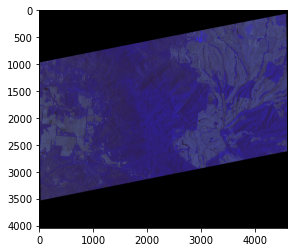

In [30]:
hsf7 = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/20191203_234346_0f4d_3B_AnalyticMS_clip.tif"
hspy7 = dir2spyref(hsf7)
u = imshow(hspy7)

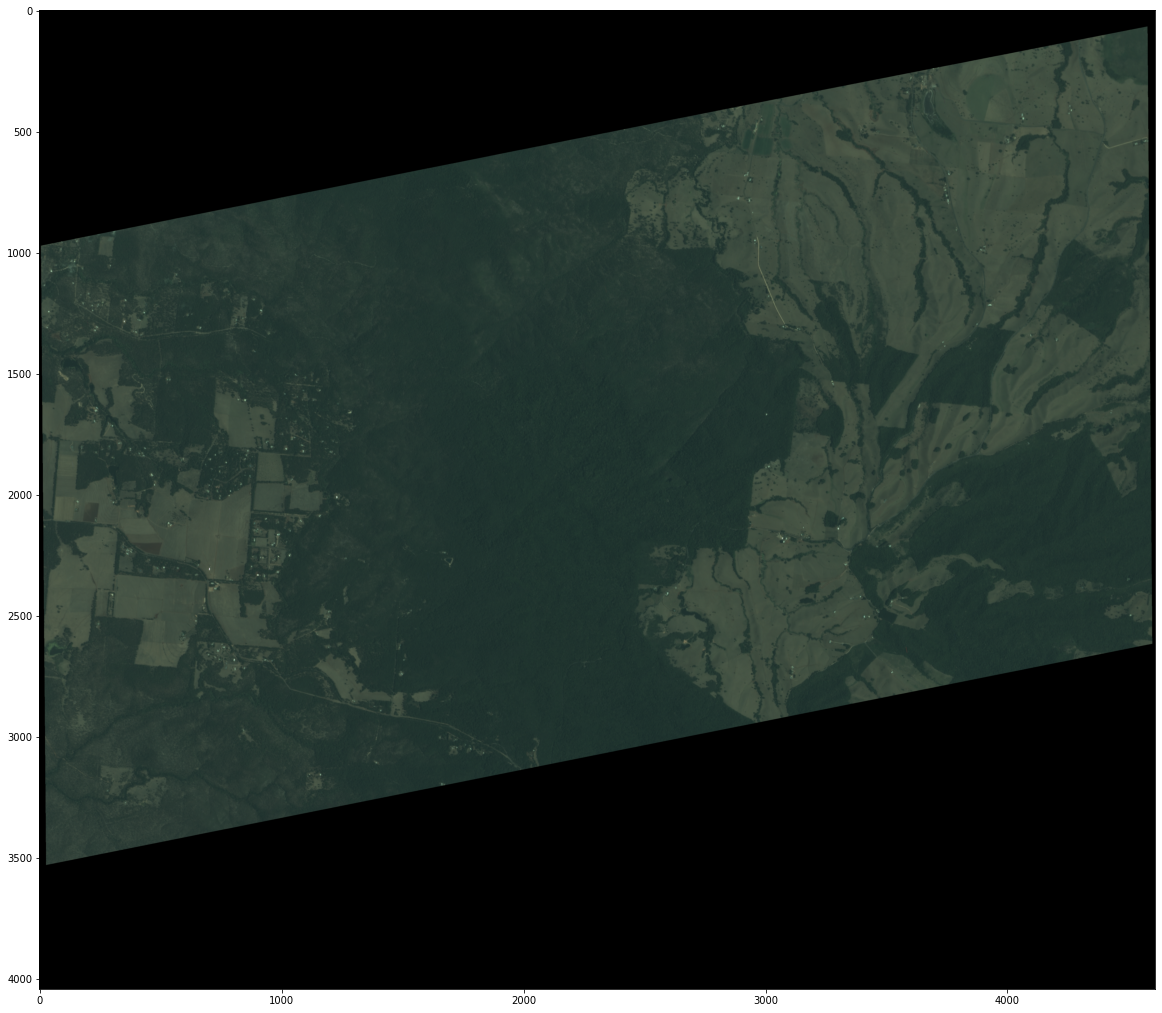

In [31]:
view = imshow(hspy7, (2, 1, 0), figsize=(20,20))


ready...
reflectance tif exists
/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/big_3B_AnalyticMS_clip_reflectance.bil


<Figure size 432x288 with 0 Axes>

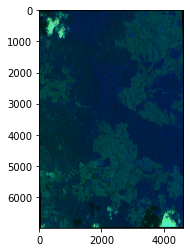

In [54]:
os.chdir("/Users/brian/code/Eucalyptus_GLMClassifier/")
%run filmstrip
hsf8 = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/big_3B_AnalyticMS_clip.tif"
hspy8 = dir2spyref(hsf8)
u = imshow(hspy8)

In [ ]:
%run filmstrip
hsf8 = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/big_3B_AnalyticMS_clip.tif"
hspy8 = dir2spyref(hsf8)
u = imshow(hspy8)

['20191203_234546_0f2e_3B_AnalyticMS_clip.tif', '20191203_234345_0f4d_3B_AnalyticMS_clip.tif', '20191203_234543_0f2e_3B_AnalyticMS_clip.tif', '20191203_234344_0f4d_3B_AnalyticMS_clip.tif', '20191203_003017_16_1064_3B_AnalyticMS_clip.tif', '20191203_003015_11_1064_3B_AnalyticMS_clip.tif', '20191203_234544_0f2e_3B_AnalyticMS_clip.tif', '20191203_234347_0f4d_3B_AnalyticMS_clip.tif', '20191203_013209_06_1069_3B_AnalyticMS_clip.tif', '20191203_234346_0f4d_3B_AnalyticMS_clip.tif', '20191203_234545_0f2e_3B_AnalyticMS_clip.tif', '20191203_003013_06_1064_3B_AnalyticMS_clip.tif']
reflectance tif exists
/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/20191203_234546_0f2e_3B_AnalyticMS_clip_reflectance.bil
/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/20191203_234345_0f4d_3B_AnalyticMS_clip.tif
/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/75

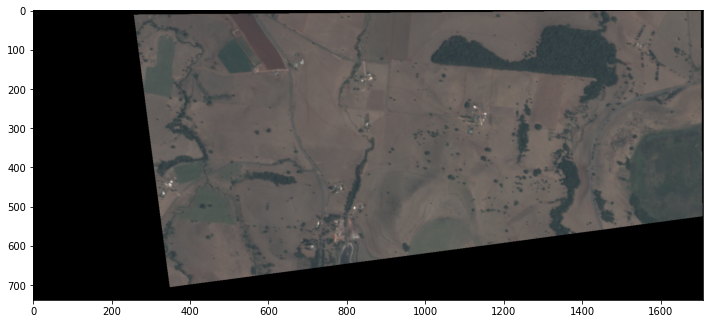

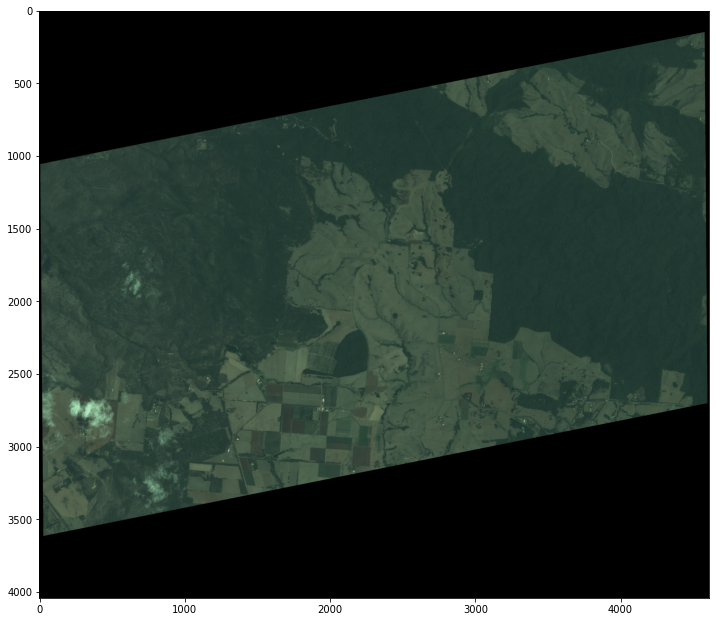

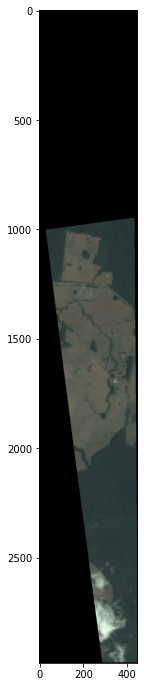

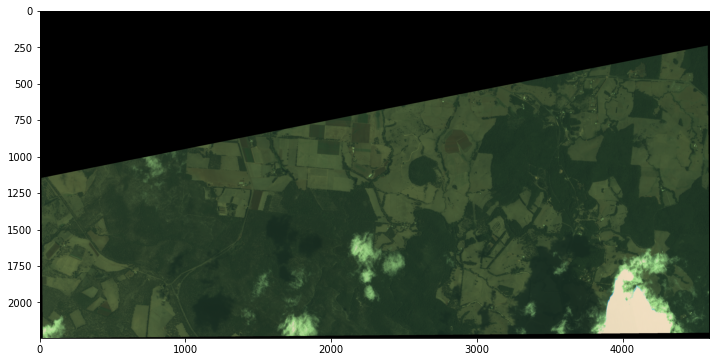

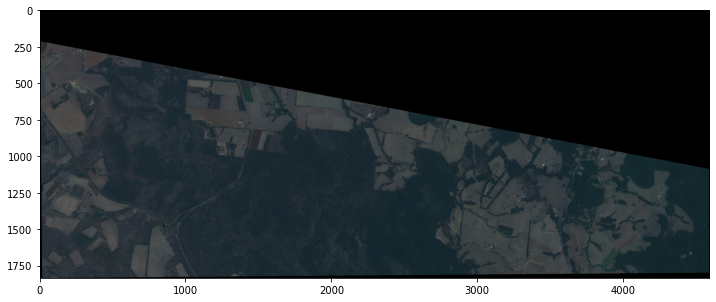

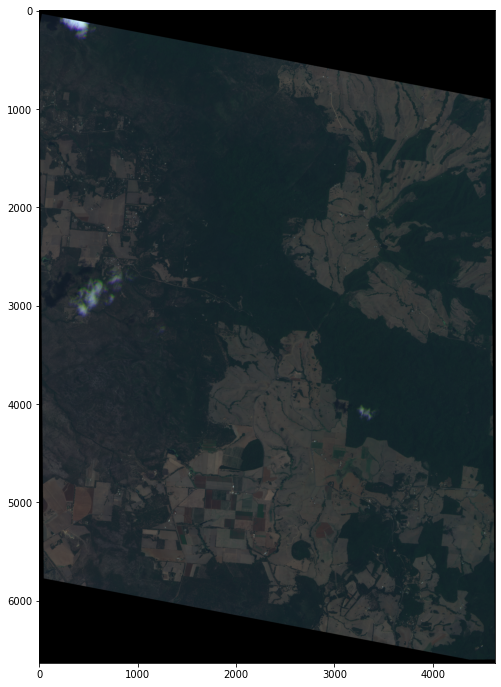

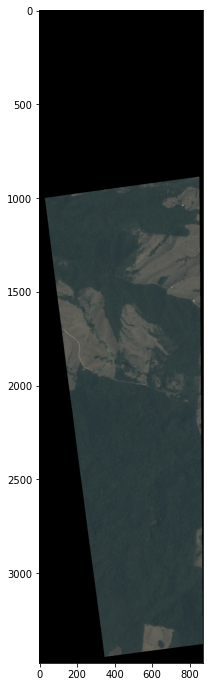

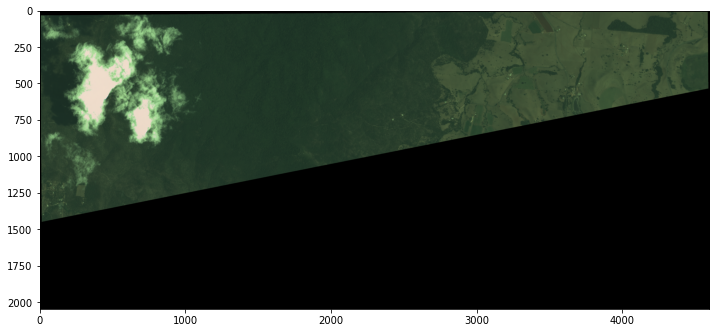

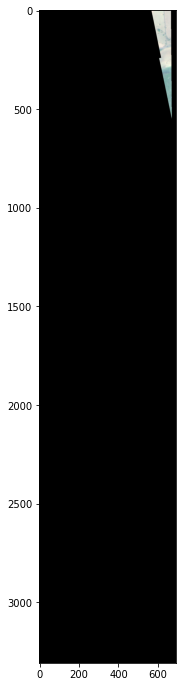

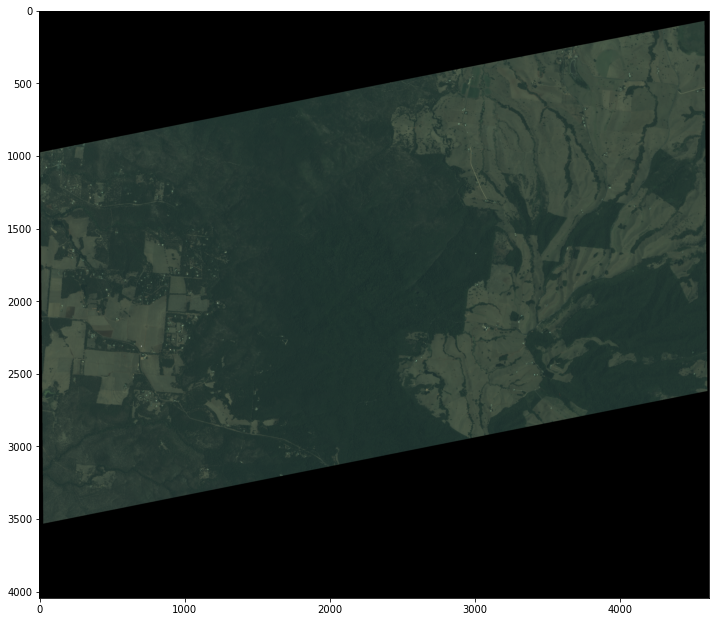

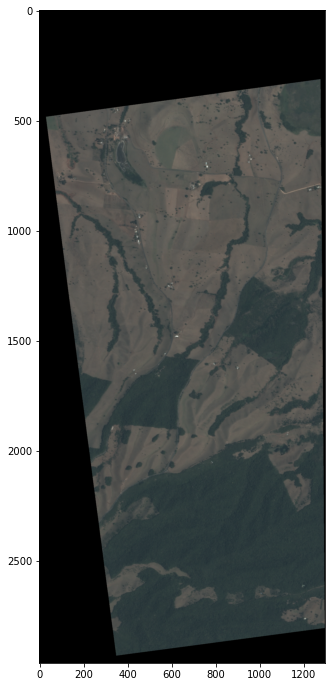

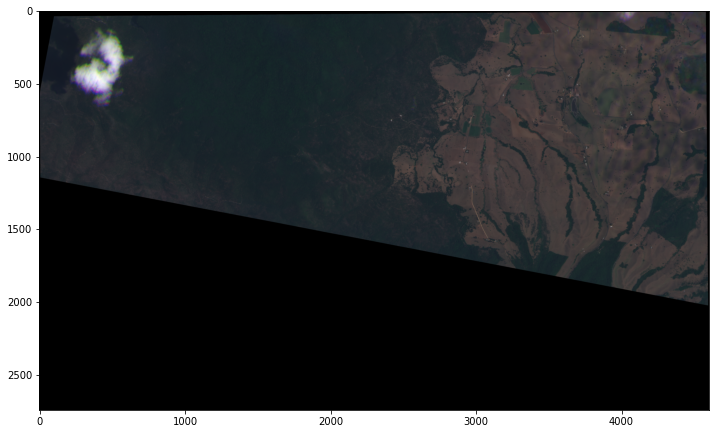

In [45]:
import glob
pdir = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/"
os.chdir(pdir)
ots = glob.glob("20191203*MS_clip.tif")
print(ots)
for f in ots:
    fullf = pdir + f
    hspyt = dir2spyref(fullf)
    view = imshow(hspyt, (2, 1, 0), figsize=(12,12))

['20191203_234546_0f2e_3B_AnalyticMS_clip.tif', '20191203_234345_0f4d_3B_AnalyticMS_clip.tif', '20191203_234543_0f2e_3B_AnalyticMS_clip.tif', '20191203_234344_0f4d_3B_AnalyticMS_clip.tif', '20191203_003017_16_1064_3B_AnalyticMS_clip.tif', '20191203_003015_11_1064_3B_AnalyticMS_clip.tif', '20191203_234544_0f2e_3B_AnalyticMS_clip.tif', '20191203_234347_0f4d_3B_AnalyticMS_clip.tif', '20191203_013209_06_1069_3B_AnalyticMS_clip.tif', '20191203_234346_0f4d_3B_AnalyticMS_clip.tif', '20191203_234545_0f2e_3B_AnalyticMS_clip.tif', '20191203_003013_06_1064_3B_AnalyticMS_clip.tif']
20191203_234344_0f4d_3B_AnalyticMS_clip.tif


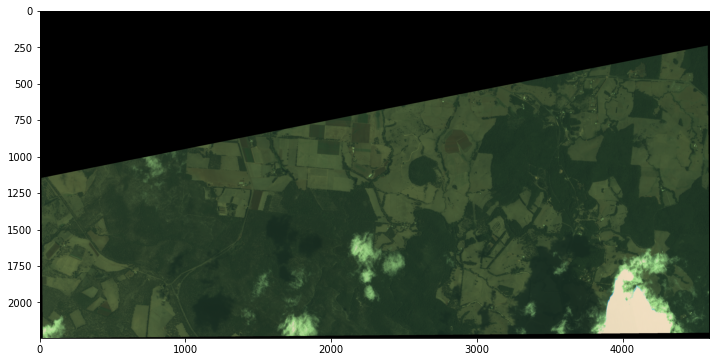

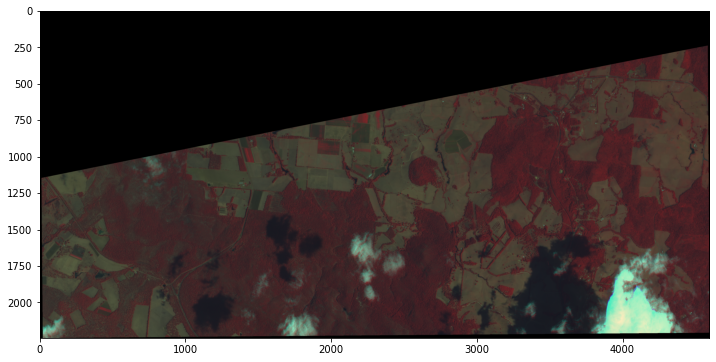

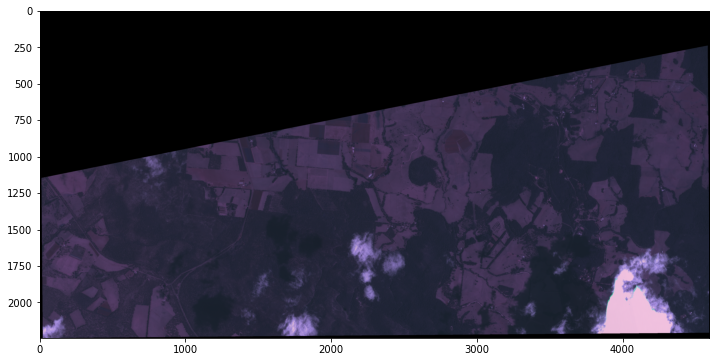

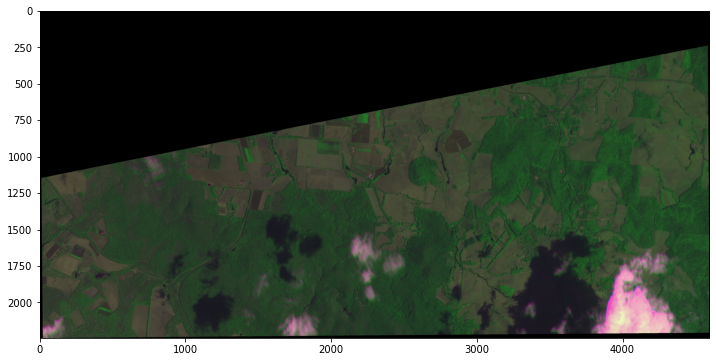

In [95]:
import glob
pdir = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/"
os.chdir(pdir)
ots = glob.glob("20191203*MS_clip.tif")
print(ots)
for f in ots[3:4]:
    fullf = pdir + f
    print(f)
    hspyt = dir2spyref(fullf)
    view = imshow(hspyt, (2, 1, 0), figsize=(12,12))
    view = imshow(hspyt, (3, 2, 0), figsize=(12,12))
    view = imshow(hspyt, (2, 0, 1), figsize=(12,12))
    view = imshow(hspyt, (2, 3, 0), figsize=(12,12))

ImageView object:
  Display bands       :  (3, 2, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 26056.0]
    G: [0.0, 24770.0]
    B: [0.0, 24922.0]

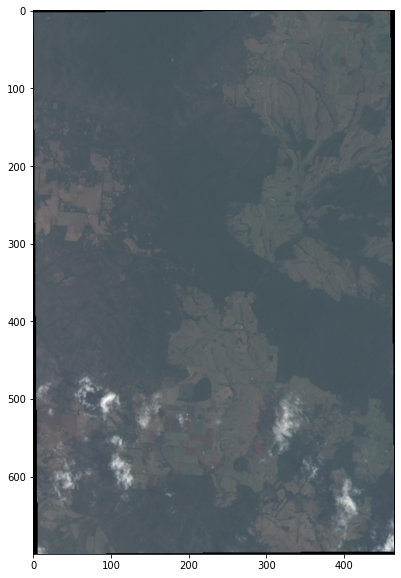

In [19]:
imshow(spy_image_herbertonDec19, (3,2,1), figsize=(10,10))

In [57]:
hnon_herberton = np.loadtxt("hnon_herberton.txt",dtype=float,delimiter=',')

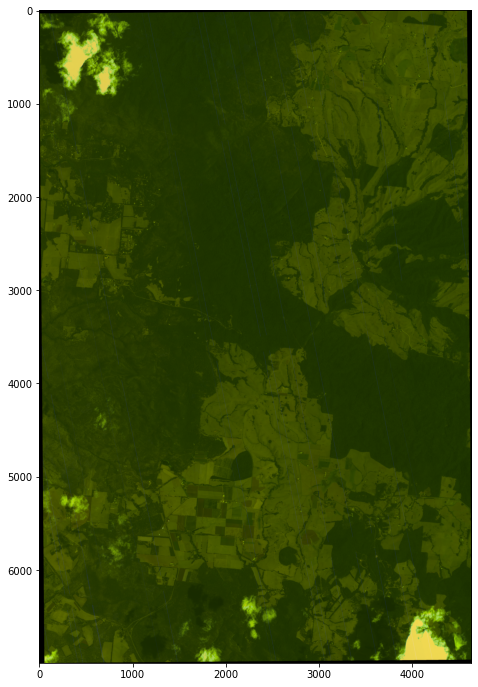

In [64]:
view = imshow(hspy8, (2, 1, 0), figsize=(12,12))

In [61]:
def train_and_apply_single(hnon_training_loc,hnon_target_loc,spy_image,fg):
    traint_training_loc_full = spy.create_training_classes(spy_image,hnon_training_loc)
    gmlc1_training_loc_full = GaussianClassifier(traint_training_loc_full)
    clmap1_target_loc_training_loc_full = gmlc1_training_loc_full.classify_image(spy_image)

    gtresults_target_loc_training_loc_full = clmap1_target_loc_training_loc_full * (hnon_target_loc != 0)

    v = imshow(classes=gtresults_target_loc_training_loc_full,figsize=(fg,fg),interpolation='none')
    testing_errors2_target_loc_training_loc_full = gtresults_target_loc_training_loc_full * (gtresults_target_loc_training_loc_full != hnon_target_loc)
    unique, counts = np.unique(testing_errors2_target_loc_training_loc_full, return_counts=True)

    imshow(classes=testing_errors2_target_loc_training_loc_full,figsize=(fg,fg),interpolation='none')

    classification_metrics(hnon_target_loc,gtresults_target_loc_training_loc_full)

spectral:INFO: Setting min samples to 12
INFO:spectral:Setting min samples to 12


ready...
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Classifying image...  0.Classifying image...  1.Classifying image...  2.Classifying image...  3.Classifying image...  4.Classifying image...  5.Classifying image...  6.Classifying image...  7.Classifying image...  8.Classifying image...  9.Classifying image... 10.Classifying image... 11.Classifying image... 12.Classifying image... 13.Classifying image... 14.Classifying image... 15.Classifying image... 16.Classifying image... 17.Classifying image... 18.Classifying image... 19.Classifying image... 20.Classifying image... 21.Classifying image... 22.Classifying image... 23.Classifying image... 24.Classifying image... 25.Classifying image... 26.Classifying image... 27.Classifying image... 28.Classifying image... 29.Classifying image... 30.Classifying image... 31.Classifying image... 32.Classifying image... 33.Classifying image... 34.Classifying image... 35.Cla

<Figure size 432x288 with 0 Axes>

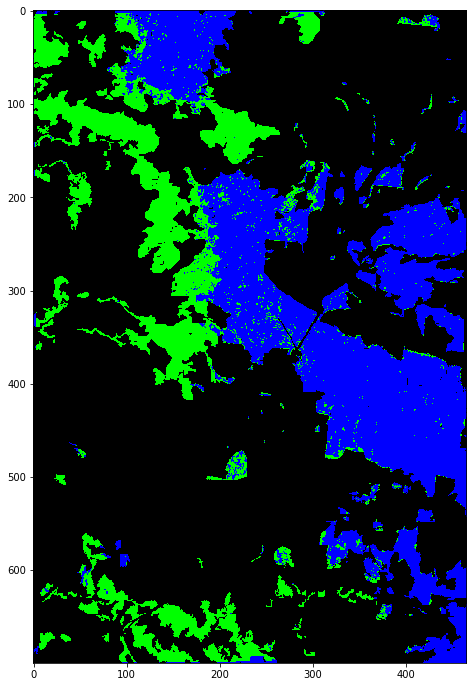

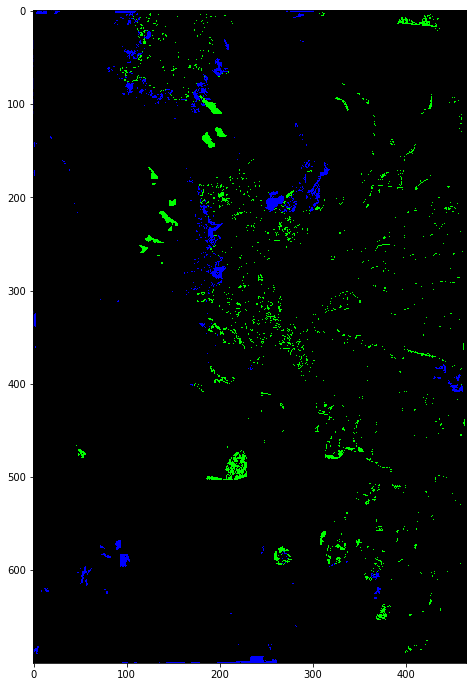

In [63]:
import spectral as spy
%run create_training_polygons
train_and_apply_single(hnon_herberton,hnon_herberton,spy_image_herbertonDec19,12)

In [72]:
noneuc = geopandas.read_file("Non_Eucalyptus_Reg_Ecos_2017/Non_Eucalypt_RE.shp")
euc = geopandas.read_file("Monospecies_Reg_Ecos_2017/FF_SingleSp_RE_2017_V11.shp")
eucmg = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")
eucmgs = eucmg[['RE', 'Descriptio', 'geometry']].copy()
noneucs = noneuc[['RE', 'Descriptio', 'geometry']].copy()
eucs = euc[['QLD_REG_EC','FF_singl_1','geometry']].copy()
eucs.rename(columns={'QLD_REG_EC': 'RE', 'FF_singl_1': 'Descriptio', 'geometry': 'geometry'}, inplace=True)
eucs['euc'] = 1
eucmgs['euc'] = 1
noneucs['euc'] = 0
merged = eucs.append(eucmgs,sort=False)
fpdf = merged.append(noneucs,sort=False)

needed_herberton_polygons = fpdf[fpdf.intersects(herberton)]

ready...
------ xkpls_m
------src.ref_____
EPSG:32755
---------lbrt-------------
331416.0 8058303.0 345318.0 8079294.0
---------spoly-------------
POLYGON ((331416 8079294, 331416 8058303, 345318 8058303, 345318 8079294, 331416 8079294))
image pixel dimensions:
(6997, 4634, 4)


/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axi

xpoly.bounds: (331416.0, 8058303.0, 345318.0, 8079294.0)
chd:20991.0 cwd:13902.0
poly number: 1
0
dfn: 276
0
hits number: 276
polygon 0: 2
polygon 1: 2
polygon 2: 2
polygon 3: 2
polygon 4: 2
polygon 5: 2
polygon 6: 2
polygon 7: 2
polygon 8: 2
polygon 9: 2
polygon 10: 2
polygon 11: 2
polygon 12: 2
polygon 13: 2
polygon 14: 2
polygon 15: 2
polygon 16: 2
polygon 17: 2
polygon 18: 2
polygon 19: 2
polygon 20: 2
polygon 21: 2
polygon 22: 2
polygon 23: 2
polygon 24: 2
polygon 25: 2
polygon 26: 2
polygon 27: 2
polygon 28: 2
polygon 29: 2
polygon 30: 2
polygon 31: 2
polygon 32: 2
polygon 33: 2
polygon 34: 2
polygon 35: 2
polygon 36: 2
polygon 37: 2
polygon 38: 2
polygon 39: 2
polygon 40: 2
polygon 41: 2
polygon 42: 2
polygon 43: 2
polygon 44: 2
polygon 45: 2
polygon 46: 2
polygon 47: 2
polygon 48: 2
polygon 49: 2
polygon 50: 2
polygon 51: 2
polygon 52: 2
polygon 53: 2
polygon 54: 2
polygon 55: 2
polygon 56: 2
polygon 57: 2
polygon 58: 2
polygon 59: 2
polygon 60: 2
polygon 61: 2
polygon 62: 2
po

<Figure size 432x288 with 0 Axes>

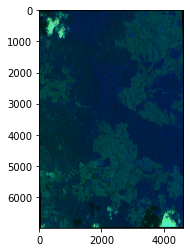

In [74]:
%run create_training_polygons

hsf8 = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec0319/7524b92a-e780-41ef-9d37-bb5e7c8e6c92/PSScene4Band/big_3B_AnalyticMS_clip.tif"
hspy8 = dir2spyref(hsf8)
u = imshow(hspy8)


hsf_herberton_planet = "/Users/brian/code/Eucalyptus_GLMClassifier/herbertonPlanetDec19_reflectance_full.tif"
#hnon = xkpls_m(hsf,spy_image,8,subset2mi,4326,4283,32655,0,441,0,745,zgz)
hnon_herberton_planet_sample = xkpls_m(hsf_herberton_planet,hspy8,8,needed_herberton_polygons,4326,4283,32755,0,6997,0,4634,zgz)

In [75]:
np.savetxt("hnon_herberton_planet.txt",hnon_herberton_planet_sample,delimiter=',')

spectral:INFO: Setting min samples to 12
INFO:spectral:Setting min samples to 12


Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Classifying image...  0.Classifying image...  1.Classifying image...  2.Classifying image...  3.Classifying image...  4.Classifying image...  5.Classifying image...  6.Classifying image...  7.Classifying image...  8.Classifying image...  9.Classifying image... 10.Classifying image... 11.Classifying image... 12.Classifying image... 13.Classifying image... 14.Classifying image... 15.Classifying image... 16.Classifying image... 17.Classifying image... 18.Classifying image... 19.Classifying image... 20.Classifying image... 21.Classifying image... 22.Classifying image... 23.Classifying image... 24.Classifying image... 25.Classifying image... 26.Classifying image... 27.Classifying image... 28.Classifying image... 29.Classifying image... 30.Classifying image... 31.Classifying image... 32.Classifying image... 33.Classifying image... 34.Classifying image... 35.Classifying 

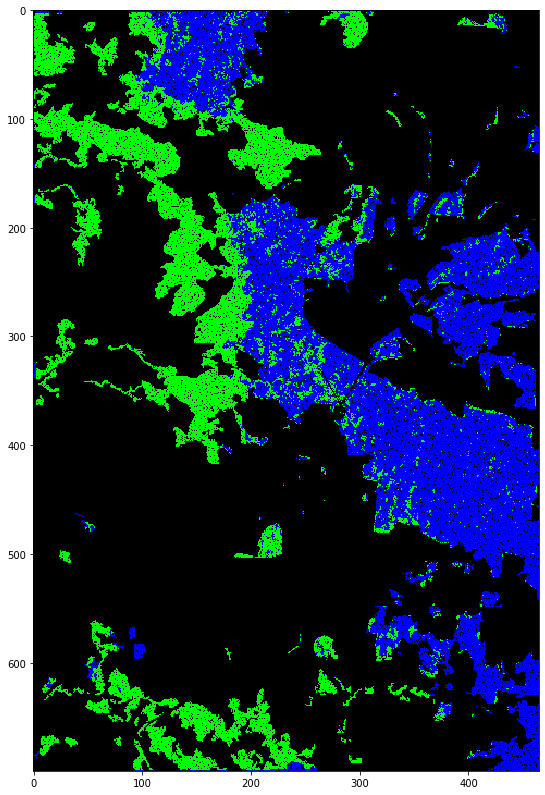

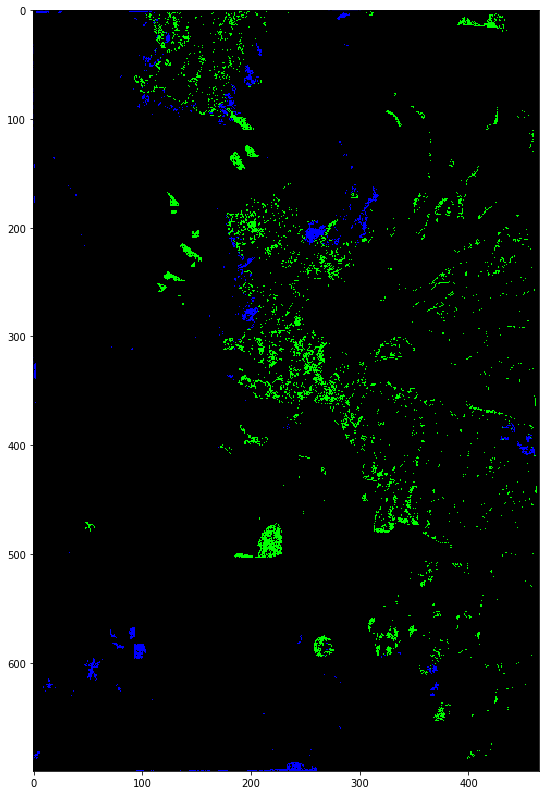

In [81]:
tandt = split_pixels_training_testing(hnon_herberton,0.1)
training_pixels = tandt[0]
testing_pixels = tandt[1]
train_and_apply_single(training_pixels,testing_pixels,spy_image_herbertonDec19,14)

spectral:INFO: Setting min samples to 4
INFO:spectral:Setting min samples to 4


Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Covariance.....  0.0Covariance.....  0.0Covariance.....done  
Classifying image...  0.Classifying image...done  


Cohen's Kappa:
0.5673813043885323

Balanced Accuracy:
0.7871845822147441


               precision    recall  f1-score   support

   Eucalyptus      0.704     0.741     0.722   3160403
NonEucalyptus      0.858     0.833     0.845   5914269

     accuracy                          0.801   9074672
    macro avg      0.781     0.787     0.784   9074672
 weighted avg      0.804     0.801     0.802   9074672



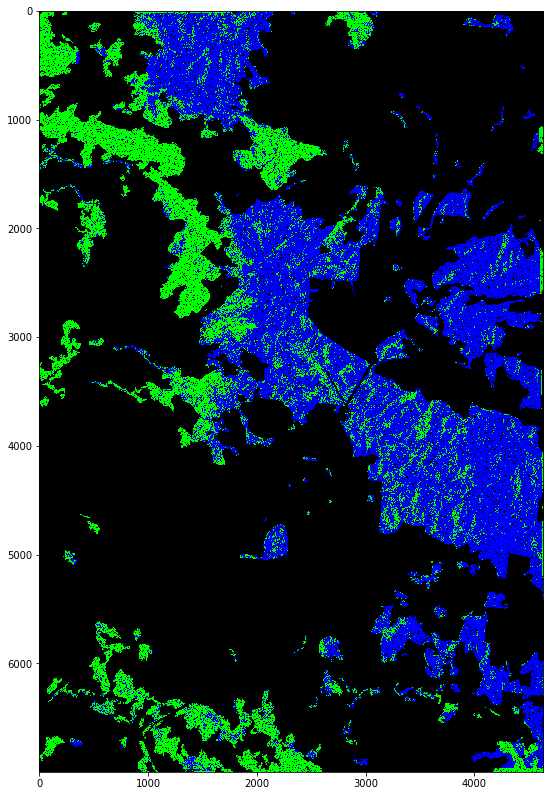

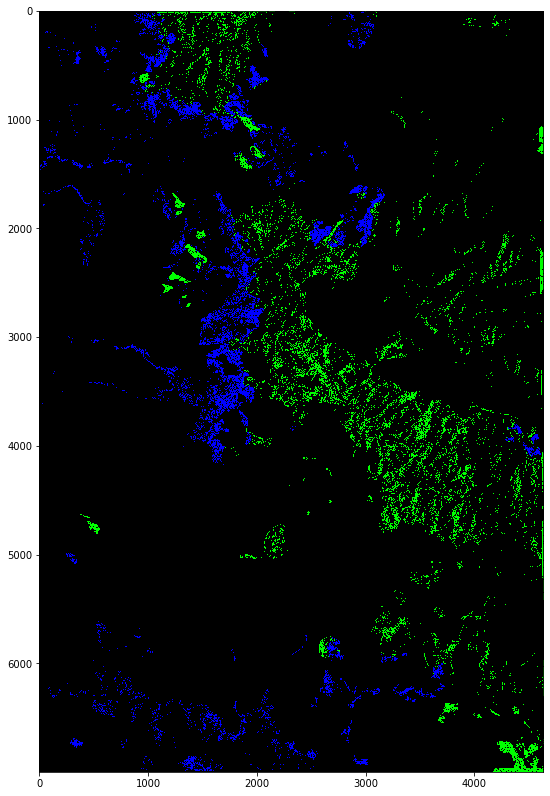

In [83]:
tandt = split_pixels_training_testing(hnon_herberton_planet_sample,0.1)
training_pixels = tandt[0]
testing_pixels = tandt[1]
train_and_apply_single(training_pixels,testing_pixels,hspy8,14)